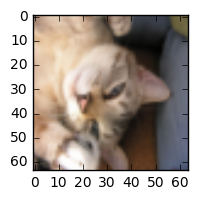

W1= (40, 12288)
b1= (40, 1)
W2= (40, 40)
b2= (40, 1)
W3= (40, 40)
b3= (40, 1)
W4= (40, 40)
b4= (40, 1)
W5= (1, 40)
b5= (1, 1)
epoch =  0 ;    cost =  0.694768900237
epoch =  500 ;    cost =  0.00215444560205
epoch =  1000 ;    cost =  0.000864037500601
epoch =  1500 ;    cost =  0.000520933877082
epoch =  2000 ;    cost =  0.000366855473364


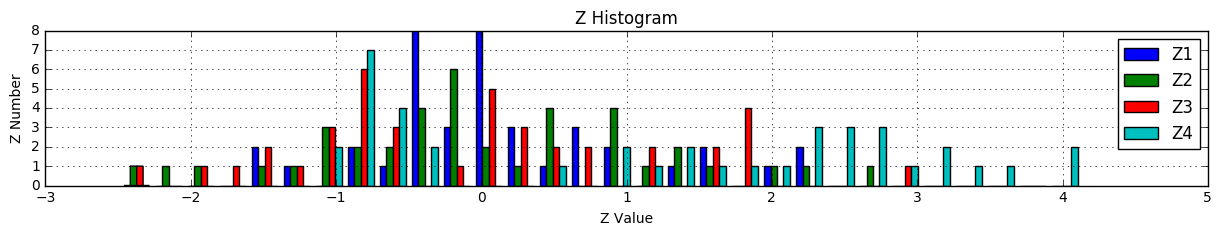

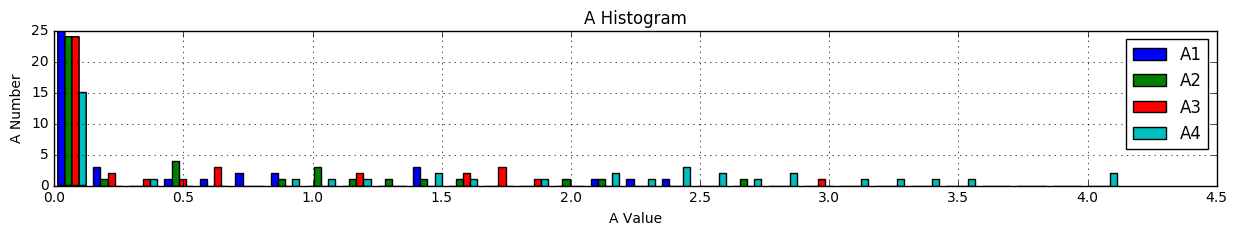

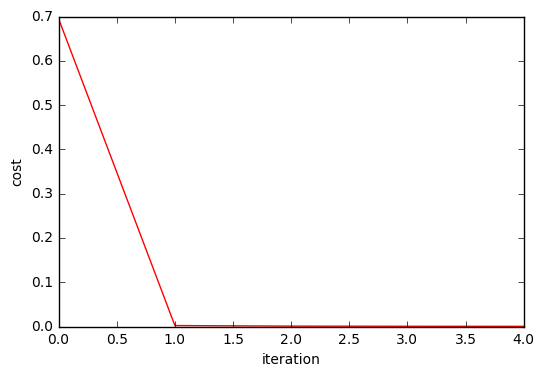

time cost= 92.73451929626998 s
===Predict Train Set ===
accuracy = 1.0
===Predict Test Set ===
accuracy = 0.68


'\n未除m\nepoch =  4000 ;    cost =  0.000661587237569\ntime cost= 193.0026398646919 s\n===Predict Train Set ===\naccuracy = 1.0\n===Predict Test Set ===\naccuracy = 0.62\n\n\n除以m\nepoch =  4000 ;    cost =  0.00135104062757\ntime cost= 191.63903652049862 s\n===Predict Train Set ===\naccuracy = 1.0\n===Predict Test Set ===\naccuracy = 0.72\n\n\n未除m\nepoch =  4000 ;    cost =  0.000665742987068\ntime cost= 189.5930199483186 s\n===Predict Train Set ===\naccuracy = 1.0\n===Predict Test Set ===\naccuracy = 0.72\n\n\n除以m\nepoch =  4000 ;    cost =  0.00135253387198\ntime cost= 188.61573503766704 s\n===Predict Train Set ===\naccuracy = 1.0\n===Predict Test Set ===\naccuracy = 0.72\n'

In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import time 

#字典！以键值对的方式保存的一种数据结构
def load_dataset():
    #1.创建文件对象
    train_dataset = h5py.File('./我的数据集/train_catvnoncat.h5','r')
    test_dataset = h5py.File('./我的数据集/test_catvnoncat.h5','r')
    #2.读取数据
    train_set_x = np.array(train_dataset["train_set_x"][:])
    train_set_y = np.array(train_dataset["train_set_y"][:])
    test_set_x = np.array(test_dataset["test_set_x"][:])
    test_set_y = np.array(test_dataset["test_set_y"][:])
    plt.figure(figsize=(2,2))
    plt.imshow(train_set_x[110])
    plt.show()
    #3.变化维度以适应神经网络输入
    #(209, 64, 64, 3) -> (12288,209)
    train_set_x = train_set_x.reshape(train_set_x.shape[0],-1).T  #(12288,209)
    test_set_x = test_set_x.reshape(test_set_x.shape[0],-1).T  #(12288,209)
    #(209,)->(1,209)
    train_set_y = train_set_y.reshape(1,train_set_y.shape[0]) #(1,209)
    test_set_y = test_set_y.reshape(1,test_set_y.shape[0]) #(1,209)
    
    return train_set_x,train_set_y,test_set_x,test_set_y

def init_parameters(fc_net):
    parameters = {}
    Layer_num = len(fc_net) #Layer_num=5    
    for L in range(1,Layer_num):
        parameters["W"+str(L)] = np.random.randn(fc_net[L],fc_net[L-1])*0.01  #梯度消失
        #parameters["W"+str(L)] = np.random.randn(fc_net[L],fc_net[L-1])*np.sqrt(1/fc_net[L-1]) #Xavier初始化，针对tanh函数
        #parameters["W"+str(L)] = np.random.randn(fc_net[L],fc_net[L-1])*np.sqrt(2/fc_net[L-1]) #He初始化，针对ReLU函数
        parameters["b"+str(L)] = np.zeros((fc_net[L],1))  
        parameters["gamma"+str(L)] = np.ones((fc_net[L],1))  
        parameters["beta"+str(L)] = np.zeros((fc_net[L],1))
        parameters["running_mean"+str(L)] = np.zeros((fc_net[L],1))  
        parameters["running_std"+str(L)] = np.zeros((fc_net[L],1))  
    for L in range(1,Layer_num):
        print("W"+str(L)+"=",parameters["W"+str(L)].shape)
        print("b"+str(L)+"=",parameters["b"+str(L)].shape)                       
    return parameters

def init_parameters_momentum(fc_net):
    parameters = {}
    Layer_num = len(fc_net) #Layer_num=5 
    v = {}
    for L in range(1,Layer_num):
        #parameters["W"+str(L)] = np.random.randn(fc_net[L],fc_net[L-1])*0.01  #
        parameters["W"+str(L)] = np.random.randn(fc_net[L],fc_net[L-1])*np.sqrt(1/fc_net[L-1]) #Xavier初始化，针对tanh函数
        #parameters["W"+str(L)] = np.random.randn(fc_net[L],fc_net[L-1])*np.sqrt(2/fc_net[L-1]) #He初始化，针对ReLU函数
        parameters["b"+str(L)] = np.zeros((fc_net[L],1))     
        v["dW"+str(L)] = np.zeros((fc_net[L],fc_net[L-1]))
        v["db"+str(L)] = np.zeros((fc_net[L],1))           
    for L in range(1,Layer_num):
        print("W"+str(L)+"=",parameters["W"+str(L)].shape)
        print("b"+str(L)+"=",parameters["b"+str(L)].shape)                       
    return parameters,v

def init_parameters_RMSProp(fc_net):
    parameters = {}
    Layer_num = len(fc_net) #Layer_num=5 
    s = {}
    for L in range(1,Layer_num):
        #parameters["W"+str(L)] = np.random.randn(fc_net[L],fc_net[L-1])*0.01  #
        parameters["W"+str(L)] = np.random.randn(fc_net[L],fc_net[L-1])*np.sqrt(1/fc_net[L-1]) #Xavier初始化，针对tanh函数
        #parameters["W"+str(L)] = np.random.randn(fc_net[L],fc_net[L-1])*np.sqrt(2/fc_net[L-1]) #He初始化，针对ReLU函数
        parameters["b"+str(L)] = np.zeros((fc_net[L],1))     
        s["dW"+str(L)] = np.zeros((fc_net[L],fc_net[L-1]))
        s["db"+str(L)] = np.zeros((fc_net[L],1))           
    for L in range(1,Layer_num):
        print("W"+str(L)+"=",parameters["W"+str(L)].shape)
        print("b"+str(L)+"=",parameters["b"+str(L)].shape)                       
    return parameters,s


def ReLU(Z):
    return np.maximum(0,Z)

def tanh(Z):
    return np.tanh(Z)

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def BN_forward(Z,bn_mode,parameters,L,eps=1e-8,yita=0.9):
    Z_mean , Z_std =  np.zeros((Z.shape[0],1)),np.zeros((Z.shape[0],1))
    Z_norm , Z_out =  np.zeros(Z.shape),np.zeros(Z.shape)
    gamma ,beta = parameters["gamma"+str(L)],parameters["beta"+str(L)]
    if bn_mode=="train":
        Z_mean = np.mean(Z,axis=1,keepdims=True)
        Z_std = np.std(Z,axis=1,keepdims=True)
        Z_norm = (Z - Z_mean)/ (Z_std+eps)
        Z_out = gamma * Z_norm + beta
        parameters["running_mean"+str(L)] = yita * parameters["running_mean"+str(L)] + (1 - yita) * Z_mean  #求所有batch的均值的数学期望，实际上相当于求整个训练集的均值
        parameters["running_std"+str(L)] = yita * parameters["running_std"+str(L)] + (1 - yita) * Z_std #求所有batch的标准差的数学期望，实际上相当于求整个训练集的标准差
    elif bn_mode=="test":
        Z_norm = (Z - parameters["running_mean"+str(L)])/ (parameters["running_std"+str(L)]+eps)
        Z_out = gamma * Z_norm + beta
    else:
        print("bn_mode error!")
    return Z_out,Z_mean,Z_std,Z_norm,parameters

def BN_backward(dZ,bn_cache,parameters,L,eps=1e-8): 
    m = dZ.shape[1]
    gamma,beta = parameters["gamma"+str(L)],parameters["beta"+str(L)]  
    Z_mean,Z_std,Z_norm = bn_cache["Z_mean"+str(L)],bn_cache["Z_std"+str(L)],bn_cache["Z_norm"+str(L)]
    dgamma = np.sum(dZ * Z_norm,axis=1,keepdims=True)
    dbeta = np.sum(dZ,axis=1,keepdims=True)
    #dgamma = np.sum(dZ * Z_norm,axis=1,keepdims=True)/m  #加了m以后，发现没什么区别
    #dbeta = np.sum(dZ,axis=1,keepdims=True)/m
    dZ_out = (gamma/(Z_std+eps)) * (dZ - dgamma*Z_norm/m - np.mean(dZ,axis=1,keepdims=True))
    return dZ_out, dgamma, dbeta

def forward_pass(A0,parameters,bn_mode,use_bn=False,active_func="ReLU"):    #前向计算函数
    cache ={}
    A = A0
    cache["A0"] = A0
    bn_cache = {}
    Layer_num = len(parameters) // 6 
    for L in range(1,Layer_num): #遍历[1,2,3]
        if use_bn:
            Z = np.dot(parameters["W"+str(L)],A) 
            Z,Z_mean,Z_std,Z_norm,parameters = BN_forward(Z,bn_mode,parameters,L,eps=1e-8,yita=0.9)
            bn_cache["Z_mean"+str(L)] = Z_mean
            bn_cache["Z_std"+str(L)] = Z_std
            bn_cache["Z_norm"+str(L)] = Z_norm
        else:
            Z = np.dot(parameters["W"+str(L)],A) + parameters["b"+str(L)] 
        
        if active_func=="sigmoid":
            A = sigmoid(Z)
        elif active_func=="tanh":
            A = tanh(Z)
        else:
            A = ReLU(Z)
        cache["A"+str(L)] = A
        cache["Z"+str(L)] = Z
        
    Z = np.dot(parameters["W"+str(Layer_num)],A) + parameters["b"+str(Layer_num)] #python的广播机制
    A = sigmoid(Z)
    cache["A"+str(Layer_num)] = A
    cache["Z"+str(Layer_num)] = Z
    return A,cache,bn_cache,parameters

def compute_cost(AL,Y):
    m = Y.shape[1]   #Y =（1,209）
    #cost = (1/m)*np.sum((1/2)*(AL-Y)*(AL-Y)) #代价函数
    cost = - np.sum(  Y * np.log(AL) + (1 - Y) * np.log(1 - AL)  ) / m  #交叉熵
    return cost

def backward_pass(AL,parameters,cache,bn_cache,Y,use_bn=False,active_func="ReLU"):
    m = Y.shape[1]  #样本总数
    gradient = {}   #保存各层参数梯度的字典
    Layer_num = len(parameters) // 6
    #dZL = (AL-Y)*(AL*(1-AL))#获取最末层误差信号 dZL.shape = (1,209) 
    dZL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) * AL*(1-AL)  #交叉熵代价函数dZ
    gradient["dW"+str(Layer_num)] = (1/m)*np.dot(dZL,cache["A"+str(Layer_num-1)].T)
    gradient["db"+str(Layer_num)] = (1/m)*np.sum(dZL,axis=1,keepdims = True)    
    for L in reversed(range(1,Layer_num)): #遍历[3,2,1]，其中reversed函数[1,2,3]颠倒为[3,2,1]
        if active_func=="sigmoid":
            dZL = np.dot(parameters["W"+str(L+1)].T,dZL)*(cache["A"+str(L)]*(1-cache["A"+str(L)]))  #dsigmoid/dz  = a*(1-a)
        elif active_func=="tanh":
            dZL = np.dot(parameters["W"+str(L+1)].T,dZL)*(1-np.power(cache["A"+str(L)],2))#dtanh/dz  = 1-a^2
        else:
            dZL = np.dot(parameters["W"+str(L+1)].T,dZL)* np.array(cache["Z"+str(L)]>0) 
        if use_bn:
            dZL, dgamma, dbeta = BN_backward(dZL,bn_cache,parameters,L)
            gradient["dgamma"+str(L)] = dgamma
            gradient["dbeta"+str(L)] = dbeta
            gradient["dW"+str(L)] = (1/m)*np.dot(dZL,cache["A"+str(L-1)].T)
        else:
            gradient["dW"+str(L)] = (1/m)*np.dot(dZL,cache["A"+str(L-1)].T)
            gradient["db"+str(L)] = (1/m)*np.sum(dZL,axis=1,keepdims = True)        
    return gradient

def update_parameters(gradient,parameters,LearnRate,use_bn=False):
    Layer_num = len(parameters) // 6
    if(use_bn):
        for L in range(1,Layer_num): #遍历[1,2,3] ,因为最后一层不做BatchNormalization
            parameters["W"+str(L)] = parameters["W"+str(L)] - LearnRate*gradient["dW"+str(L)]
            parameters["gamma"+str(L)] = parameters["gamma"+str(L)] - LearnRate*gradient["dgamma"+str(L)]
            parameters["beta"+str(L)] = parameters["beta"+str(L)] - LearnRate*gradient["dbeta"+str(L)]  
        parameters["W"+str(Layer_num)] = parameters["W"+str(Layer_num)] - LearnRate*gradient["dW"+str(Layer_num)]
        parameters["b"+str(Layer_num)] = parameters["b"+str(Layer_num)] - LearnRate*gradient["db"+str(Layer_num)]  
    else:
        for L in range(1,Layer_num+1): #遍历[1,2,3,4]
            parameters["W"+str(L)] = parameters["W"+str(L)] - LearnRate*gradient["dW"+str(L)]
            parameters["b"+str(L)] = parameters["b"+str(L)] - LearnRate*gradient["db"+str(L)]  
    return parameters

def update_parameters_with_momentum(gradient,parameters,LearnRate,v,momentum=0.9):
    #w:=w-lr*dw  ;   b:=b-lr*db
    Layer_num = len(parameters) // 6
    for L in range(1,Layer_num+1): #遍历[1,2,3,4]
        v["dW"+str(L)] = momentum*v["dW"+str(L)] + gradient["dW"+str(L)]   
        parameters["W"+str(L)] = parameters["W"+str(L)] - LearnRate*v["dW"+str(L)]
        v["db"+str(L)] = momentum*v["db"+str(L)] + gradient["db"+str(L)] 
        parameters["b"+str(L)] = parameters["b"+str(L)] - LearnRate*v["db"+str(L)]
    return parameters,v

def update_parameters_with_RMSProp(gradient,parameters,LearnRate,s,decay=0.9,esp=1e-8):
    #w:=w-lr*dw  ;   b:=b-lr*db
    Layer_num = len(parameters) // 6
    for L in range(1,Layer_num+1): #遍历[1,2,3,4]
        s["dW"+str(L)] = decay*s["dW"+str(L)] + (1-decay)*gradient["dW"+str(L)]**2  
        parameters["W"+str(L)] = parameters["W"+str(L)] - LearnRate*gradient["dW"+str(L)]/np.sqrt(s["dW"+str(L)]+esp)
        s["db"+str(L)] = decay*s["db"+str(L)] + (1-decay)*gradient["db"+str(L)]**2 
        parameters["b"+str(L)] = parameters["b"+str(L)] - LearnRate*gradient["db"+str(L)]/np.sqrt(s["db"+str(L)]+esp)
    return parameters,s


def cut_data(train_set_x,train_set_y,batch_size=64):
    m = train_set_x.shape[1]
    #1.打乱数据集
    permutation=list(np.random.permutation(m))
    X_shuffled = train_set_x[:,permutation]
    Y_shuffled = train_set_y[:,permutation]   
    train_set_cutted=[]
    #2.分批
    num_batch = m//batch_size  #3   
    for i in range(num_batch):
        mini_batch_X = X_shuffled[:,i*batch_size:(i+1)*batch_size]
        mini_batch_Y = Y_shuffled[:,i*batch_size:(i+1)*batch_size]
        mini_batch = (mini_batch_X,mini_batch_Y)
        train_set_cutted.append(mini_batch)        
    if m%batch_size!=0:
        mini_batch_X = X_shuffled[:,(i+1)*batch_size:]
        mini_batch_Y = Y_shuffled[:,(i+1)*batch_size:]
        mini_batch = (mini_batch_X,mini_batch_Y)
        train_set_cutted.append(mini_batch)        
    return train_set_cutted
            
    
def Train_Net(fc_net,train_set_x,train_set_y,batch_size,check=False,num_epoch=500,
                              LearnRate=0.01,active_func="ReLU",optimizer="SGD",bn_mode="train",use_bn=False):
    #初始化参数
    if(optimizer=="momentum"):    
        parameters,v = init_parameters_momentum(fc_net)
    elif(optimizer=="RMSProp"):
        parameters,s = init_parameters_RMSProp(fc_net)
    else:
        parameters = init_parameters(fc_net)
    costs = []
    for epoch in range(0,num_epoch):
        #在每一个epoch周期，都将整批数据分割成多个小批次
        train_set_cutted = cut_data(train_set_x,train_set_y,batch_size)
        for minibatch in train_set_cutted:#遍历所有批次，每一个批次都更新一次参数，从而加快收敛速度
            mini_batch_X,mini_batch_Y = minibatch
            AL,cache,bn_cache,parameters = forward_pass(mini_batch_X,parameters,bn_mode,use_bn,active_func)
            #计算代价值
            cost = compute_cost(AL,mini_batch_Y)         
            if epoch%500 == 0: 
                print("epoch = ",epoch,";    cost = ",cost)
                costs.append(cost)
            #反向传播计算梯度
            gradient = backward_pass(AL,parameters,cache,bn_cache,mini_batch_Y,use_bn,active_func)
            #根据梯度更新一次参数
            if(optimizer=="momentum"):    
                parameters,v = update_parameters_with_momentum(gradient,parameters,LearnRate,v)
            elif(optimizer=="RMSProp"):
                parameters,s = update_parameters_with_RMSProp(gradient,parameters,LearnRate,s)
            else:
                parameters = update_parameters(gradient,parameters,LearnRate,use_bn)
        if epoch>200 and epoch%2000 == 0:
            target0=[cache["Z1"][:,1],cache["Z2"][:,1],cache["Z3"][:,1],cache["Z4"][:,1]]
            plt.figure(figsize=(15,2))
            plt.hist(target0,bins=30,label=["Z1","Z2","Z3","Z4"])
            plt.grid(True)
            plt.legend(loc=0)
            plt.xlabel("Z Value")
            plt.ylabel("Z Number")
            plt.title("Z Histogram")            
            target1=[cache["A1"][:,1],cache["A2"][:,1],cache["A3"][:,1],cache["A4"][:,1]]
            plt.figure(figsize=(15,2))
            plt.hist(target1,bins=30,label=["A1","A2","A3","A4"])
            plt.grid(True)
            plt.legend(loc=0)
            plt.xlabel("A Value")
            plt.ylabel("A Number")
            plt.title("A Histogram")
            plt.show() 
            
    plt.plot(costs,'r')
    plt.xlabel("iteration")
    plt.ylabel("cost")
    plt.show()
    return parameters

def Predict(A0,Y,parameters,active_func,bn_mode="test",use_bn=False):
    AL,_0,_1,_2 = forward_pass(A0,parameters,bn_mode,use_bn,active_func)
    m = AL.shape[1]
    p = np.zeros(AL.shape)
    for i in range(0,AL.shape[1]):
        if AL[0,i]>0.5:
            p[0,i]=1
        else:
            p[0,i]=0           
    accuracy = (1/m)* np.sum(p==Y)
    print("accuracy =",accuracy)
                
if __name__ == '__main__':
    #1.加载数据
    train_set_x,train_set_y,test_set_x,test_set_y = load_dataset()
    #2.对输入像素值做归一化（0~255）->(0~1)
    train_set_x = train_set_x/255.
    test_set_x = test_set_x/255.
    #3.定义全连接神经网络各层神经元个数，并初始化参数w和b
    #fc_net = [12288,10,3,2,1]  
    fc_net = [12288,40,40,40,40,1] 
    #4.开始训练   #考虑到计算机硬件结构，一般把batch_size设置为16、32、64、128、256，可以加快计算速度 False True
    start = time.clock()
    parameters = Train_Net(fc_net,train_set_x,train_set_y,batch_size=209,num_epoch=2001,LearnRate=0.01,
                                               active_func="relu",optimizer="SGD",use_bn=True)
    end = time.clock()
    print("time cost=",end-start,"s")
    #5.开始预测
    print("===Predict Train Set ===")
    Predict(train_set_x,train_set_y,parameters,active_func="relu",use_bn=True)
    print("===Predict Test Set ===")
    Predict(test_set_x,test_set_y,parameters,active_func="relu",use_bn=True)
    
#加了BN   time cost= 567.127357516959 s  
#未加BN   time cost= 537.7936270552035 s



"""
未除m
epoch =  4000 ;    cost =  0.000661587237569
time cost= 193.0026398646919 s
===Predict Train Set ===
accuracy = 1.0
===Predict Test Set ===
accuracy = 0.62


除以m
epoch =  4000 ;    cost =  0.00135104062757
time cost= 191.63903652049862 s
===Predict Train Set ===
accuracy = 1.0
===Predict Test Set ===
accuracy = 0.72


未除m
epoch =  4000 ;    cost =  0.000665742987068
time cost= 189.5930199483186 s
===Predict Train Set ===
accuracy = 1.0
===Predict Test Set ===
accuracy = 0.72


除以m
epoch =  4000 ;    cost =  0.00135253387198
time cost= 188.61573503766704 s
===Predict Train Set ===
accuracy = 1.0
===Predict Test Set ===
accuracy = 0.72
"""